# 1.7.1 Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('Image\*.png') #('.\Image\*.png')

In [5]:
len(images)

0

In [6]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()



In [7]:
cv2.imshow('img',img)

NameError: name 'img' is not defined

## Calibration

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

NameError: name 'gray' is not defined

In [ ]:
mtx

NameError: name 'mtx' is not defined

In [ ]:
dist

array([[ 0.00437064, -0.30740809,  0.00117852,  0.00591307,  0.56052318]])

In [ ]:
print(rvecs)

[array([[-0.27980113],
       [ 0.01199061],
       [-0.02898601]]), array([[-0.2271163 ],
       [-0.23722212],
       [-0.01472641]]), array([[-0.2749734 ],
       [-0.51285007],
       [ 0.01059443]]), array([[ 0.22493441],
       [-0.55015584],
       [-3.031977  ]]), array([[-0.20930923],
       [-0.27975235],
       [ 0.00339191]]), array([[-0.21691766],
       [ 0.08518302],
       [ 0.02535186]]), array([[-0.01885754],
       [ 0.4113145 ],
       [-3.08480782]]), array([[-0.3687744 ],
       [-0.43884455],
       [ 3.03339765]]), array([[ 0.00558336],
       [ 0.37652924],
       [-3.10008717]]), array([[-0.52337463],
       [ 0.2203439 ],
       [-3.01275682]]), array([[-0.03800111],
       [ 0.25039389],
       [ 3.13128532]]), array([[-0.30326028],
       [-0.34010618],
       [-3.05970822]])]


In [ ]:
tvecs

[array([[-3.38265301],
        [-0.72061531],
        [22.52222378]]), array([[-5.48334924],
        [-0.45884546],
        [21.73736064]]), array([[-7.9087754 ],
        [-0.13977747],
        [20.74887255]]), array([[-0.88965116],
        [ 5.31568804],
        [18.4396994 ]]), array([[-5.07212915],
        [-0.85241062],
        [19.23056091]]), array([[-3.63663091],
        [-0.66944704],
        [23.35507614]]), array([[ 1.93026446],
        [ 5.08676693],
        [18.02087297]]), array([[ 1.8539346 ],
        [ 4.54405642],
        [18.76887465]]), array([[ 2.17122661],
        [ 5.0727261 ],
        [17.64772208]]), array([[ 2.52820508],
        [ 5.13816925],
        [17.00498747]]), array([[-2.20623186],
        [ 5.25634039],
        [18.09877564]]), array([[ 4.70527512],
        [ 6.17718315],
        [17.97796588]])]

## Undistortion

In [ ]:
img = cv2.imread('./Image/image50.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

NameError: name 'mtx' is not defined

## 1. Using cv2.undistort()

In [ ]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

NameError: name 'mtx' is not defined

NameError: name 'dst' is not defined

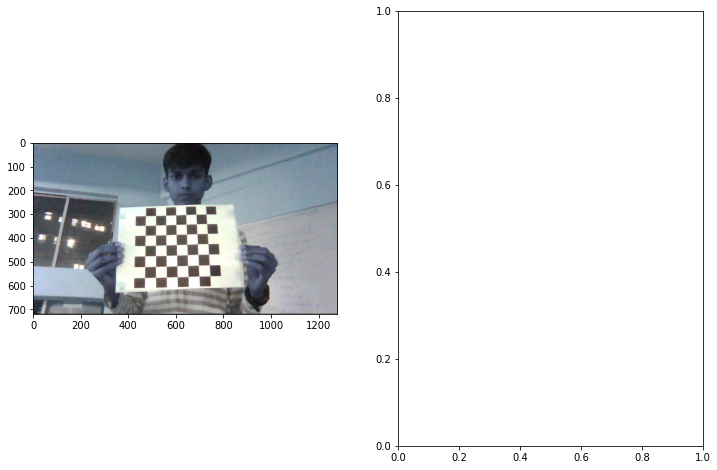

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [ ]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

NameError: name 'dst' is not defined

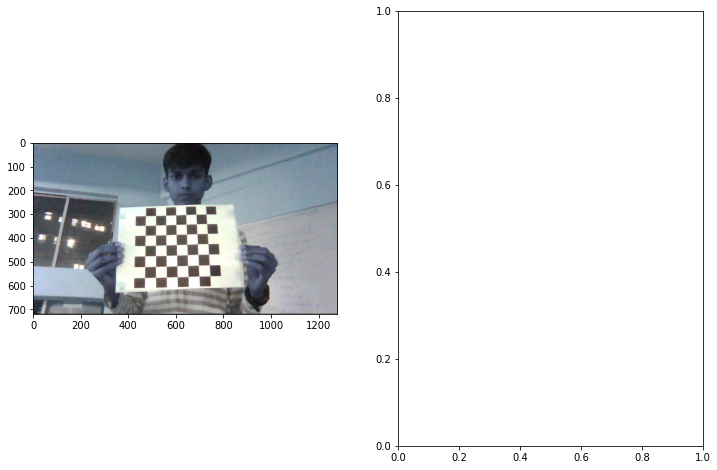

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [ ]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.0895469680853578
